In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

###  **Lode data**

In [23]:
data_path = r"../data/50_Startups.csv"
df = pd.read_csv(data_path)
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [24]:
# seprit data
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df = x_train.copy()
df['Profit'] = y_train

## Data exploering

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 12 to 38
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        40 non-null     float64
 1   Administration   40 non-null     float64
 2   Marketing Spend  40 non-null     float64
 3   State            40 non-null     object 
 4   Profit           40 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.9+ KB


In [26]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,40.000000,40.000000,40.000000,40.000000
mean,77687.845500,121142.922750,235747.081000,115651.720500
std,47897.502592,27454.110045,114863.931254,42019.018044
min,0.000000,51283.140000,0.000000,14681.400000
25%,40241.045000,102579.505000,160353.310000,90518.427500
50%,75124.210000,120134.700000,249791.995000,109543.120000
75%,120093.060000,145947.262500,304821.952500,147031.452500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [27]:
df['State'].unique()

array(['Florida', 'California', 'New York'], dtype=object)

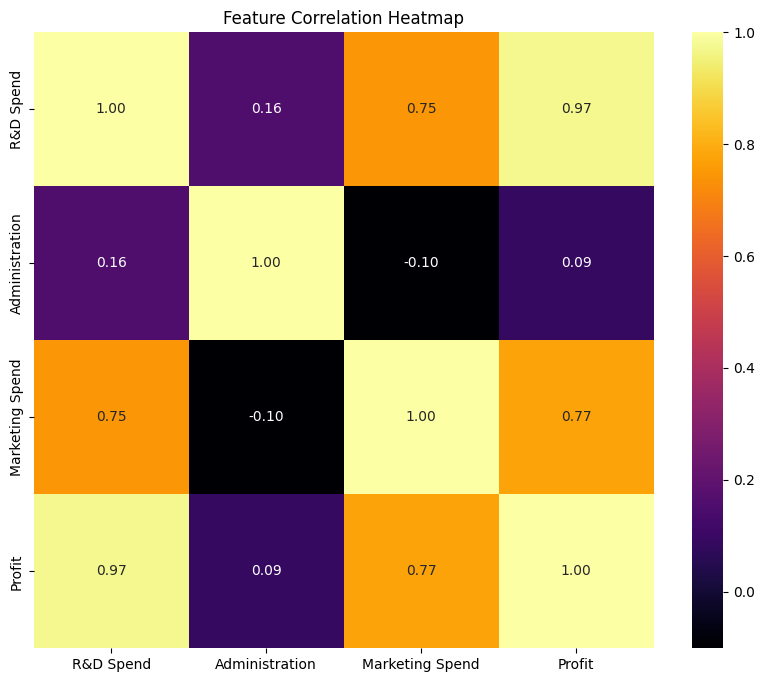

In [28]:
# Calculate correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='inferno', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

----------

In [29]:
# Features and target
x = df.iloc[:, :-1]
y = df.iloc[:,[-1]]

In [30]:
x.shape, y.shape

((40, 4), (40, 1))

In [31]:
type(x), type(y)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

## Pipline

In [32]:
num_cols = x.select_dtypes(include=["float64"]).columns
cat_cols = x.select_dtypes(include=['object']).columns

In [33]:
# start pipline
num_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler())
])

cat_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OrdinalEncoder())
])

In [34]:
# Joine the 2 pipline
preprocessor = ColumnTransformer([
    ('num', num_pipline, num_cols), #--------------------.COLMAN
    ('cat', cat_pipline, cat_cols)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

## Train the model

In [35]:
pipeline.fit(x, y)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## predict the model

In [36]:
# predict the model
y_predict = pipeline.predict(x_test)

## Evaluate model

In [37]:
# Evaluate model accuarcy
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 80929465.4909875
R-squared: 0.9000614254946283
Mean Absolute Error: 6979.1757467216985


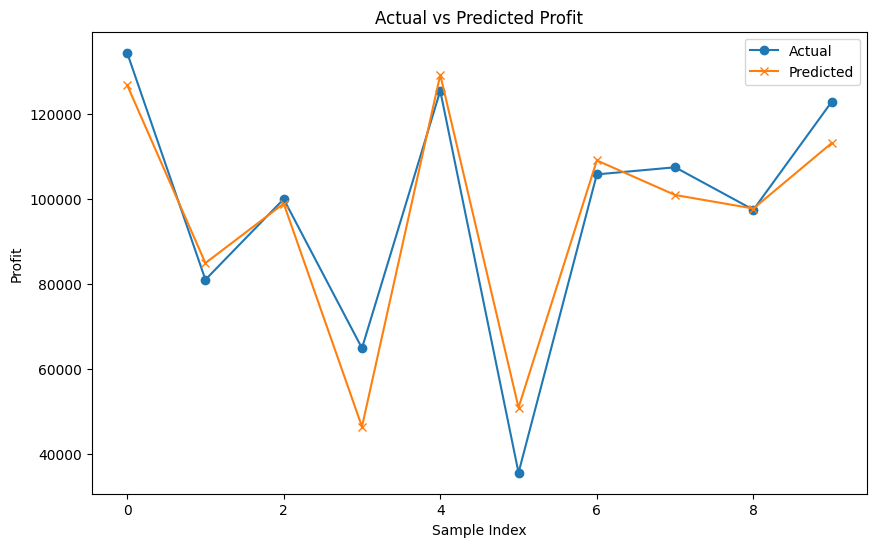

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)), y_test.values, label='Actual', marker='o')
plt.plot(range(len(y_predict)), y_predict, label='Predicted', marker='x')
plt.title('Actual vs Predicted Profit')
plt.xlabel('Sample Index')
plt.ylabel('Profit')
plt.legend()
plt.show()


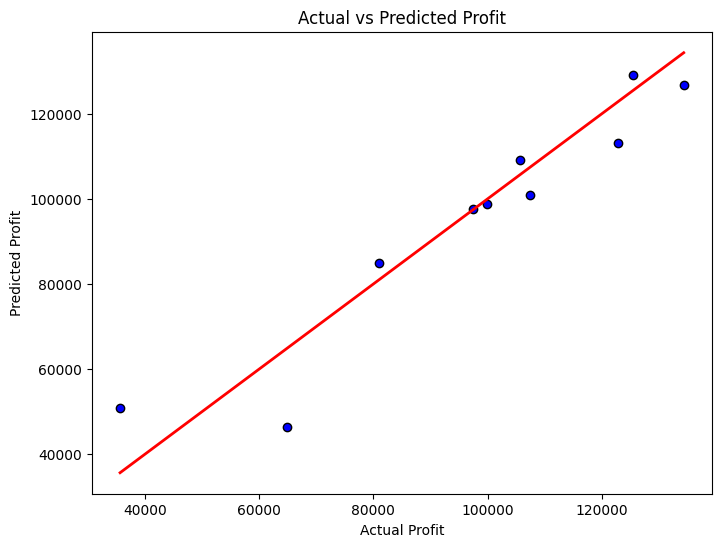

In [39]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r-', lw=2)  # perfect prediction line

plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.show()